<a href="https://colab.research.google.com/github/abubakarkhanlakhwera/Deepl-Learing/blob/main/Early_stopping/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
import seaborn as sns

In [12]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

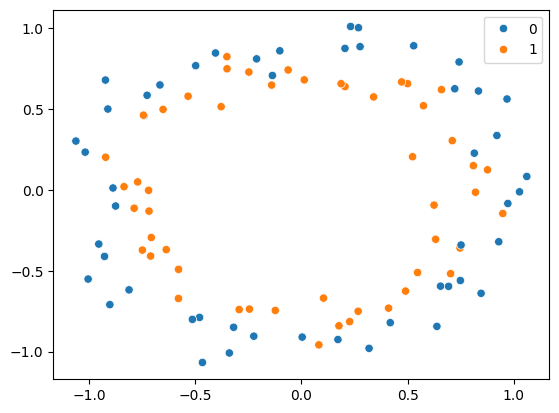

In [13]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [15]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=3500, verbose=0)

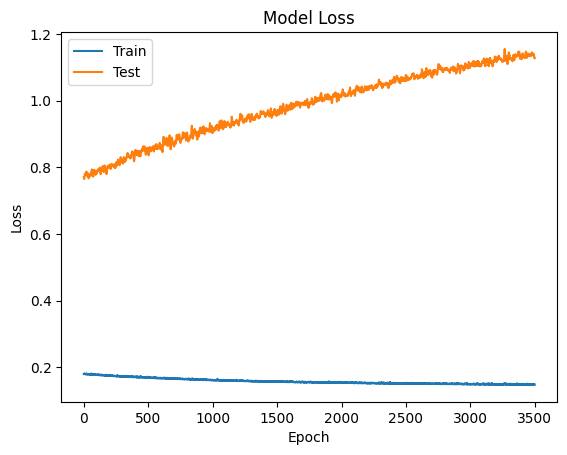

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

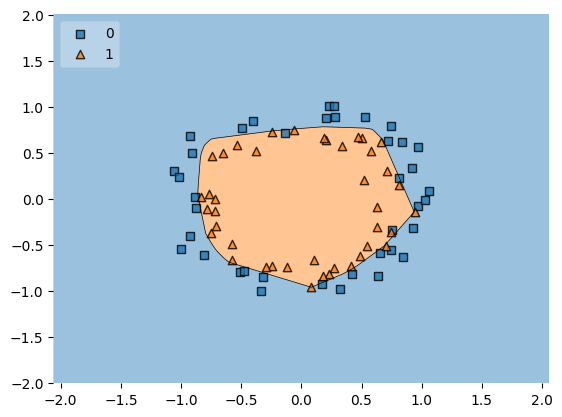

In [20]:
plot_decision_regions(X_train, y_train.ravel(), clf=model,legend=2)

**Early stopping**

In [21]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
callbacks = [EarlyStopping(monitor='val_loss',min_delta=.00001,verbose=1,mode='auto',baseline=None,restore_best_weights=False, patience=20)]

In [25]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=3500, verbose=0, callbacks=callbacks)

Epoch 21: early stopping


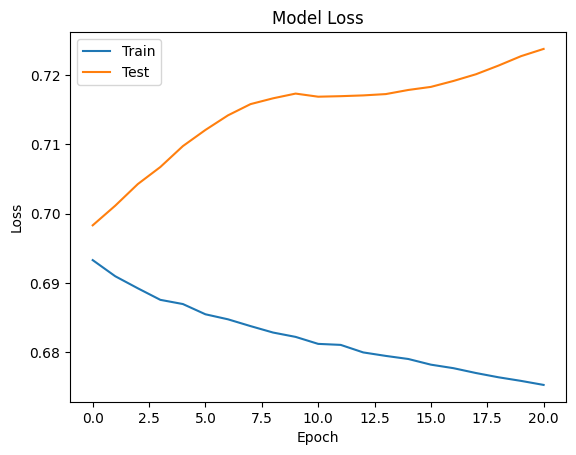

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')